In [1]:
# torch import 및 GPU(cuda0) device 할당 후 출력
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
# 1. 기본적인 전처리: Tensor로 변환
transform1 = transforms.Compose([
    transforms.ToTensor(),
])
# 2. 정규화를 포함한 전처리: Tensor로 변환 후, 이미지의 픽셀값을 [-1, 1] 범위로 정규화
transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # (mean), (std) for each channel
])
# 3. Data augmentation을 포함한 전처리: Random Crop과 Random Flip을 적용하고, Tensor로 변환 후 정규화
transform3 = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),  # calculated mean and std for CIFAR-10
])

In [4]:
batch_size = 256
# transform 만들어보기, 0~1 & -1~1 -> print 해서 확인해보기
# torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform='???')
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform1)
trainset2 = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform2)
trainset3 = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform3)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
trainloader2 = torch.utils.data.DataLoader(trainset2, batch_size=batch_size, shuffle=True)
trainloader3 = torch.utils.data.DataLoader(trainset3, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform1)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=12)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:04<00:00, 38725295.20it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [5]:
print(trainset3.data.shape)

(50000, 32, 32, 3)


In [6]:
testloader2 = iter(testloader)
images, labels = next(testloader2)
print(images[0][0], labels)

tensor([[0.2353, 0.1412, 0.2000,  ..., 0.3569, 0.1608, 0.1412],
        [0.0824, 0.0667, 0.0471,  ..., 0.6510, 0.3373, 0.0824],
        [0.1412, 0.0941, 0.1176,  ..., 0.5882, 0.6157, 0.4000],
        ...,
        [0.2627, 0.2314, 0.2157,  ..., 0.2745, 0.0863, 0.1686],
        [0.3686, 0.2941, 0.5137,  ..., 0.2431, 0.1529, 0.2275],
        [0.5569, 0.4902, 0.5922,  ..., 0.2431, 0.2431, 0.3020]]) tensor([6, 2, 9, 5, 4, 9, 5, 7, 8, 3, 1, 7, 2, 7, 3, 2, 8, 7, 6, 9, 9, 6, 9, 1,
        5, 3, 6, 6, 2, 8, 6, 3, 6, 4, 5, 3, 7, 0, 1, 6, 0, 3, 6, 5, 6, 0, 2, 2,
        1, 8, 5, 9, 5, 9, 1, 2, 0, 3, 3, 7, 9, 0, 4, 1, 9, 0, 6, 2, 5, 3, 2, 0,
        1, 5, 3, 5, 5, 2, 0, 3, 3, 3, 1, 1, 8, 3, 7, 9, 6, 2, 8, 8, 3, 1, 4, 0,
        8, 1, 4, 3, 0, 4, 3, 1, 9, 2, 1, 1, 4, 9, 9, 9, 7, 3, 9, 0, 1, 0, 7, 4,
        4, 6, 7, 1, 1, 9, 6, 4, 6, 9, 9, 6, 7, 6, 2, 7, 4, 8, 4, 0, 7, 3, 8, 9,
        3, 3, 5, 5, 5, 1, 1, 2, 5, 0, 4, 0, 2, 2, 8, 3, 4, 1, 2, 5, 6, 7, 7, 6,
        4, 6, 0, 3, 9, 6, 5, 7, 3, 3, 6, 8

In [7]:
print(trainset.data.shape)
print(testset.data.shape)
print(trainset[0][0].shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
torch.Size([3, 32, 32])


In [8]:
trainloader33 = iter(trainloader3)
images, labels = next(trainloader33)
print(images.shape)
print(images[0])

torch.Size([256, 3, 32, 32])
tensor([[[-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         ...,
         [-2.4291, -2.4291, -2.4291,  ..., -0.6457, -0.4712, -0.1804],
         [-2.4291, -2.4291, -2.4291,  ..., -0.5681, -0.7038, -0.3355],
         [-2.4291, -2.4291, -2.4291,  ..., -0.5487, -0.6844, -0.4324]],

        [[-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         ...,
         [-2.4183, -2.4183, -2.4183,  ..., -0.8842, -0.7072, -0.4122],
         [-2.4183, -2.4183, -2.4183,  ..., -0.8449, -0.9826, -0.6482],
         [-2.4183, -2.4183, -2.4183,  ..., -0.8056, -0.9432, -0.7269]],

        [[-2.2214, -2.2214, -2.2214,  ..., -2.2214, -2.2214, -2.2214],
         [-2.221

In [9]:
import matplotlib.pyplot as plt
# trainset 및 testset 데이터 이미지 각각 5개 씩 출력해보기

<function matplotlib.pyplot.show(close=None, block=None)>

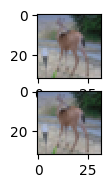

In [10]:
plt.subplot(5, 1, 1)
plt.imshow(testset.data[100])
plt.subplot(5, 1, 2)
plt.imshow(testset.data[100])
plt.show

In [11]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torchsummary
# CNN 모델 input channel 3, (32,32) 에 맞게 모델 구축하고 summary 이용하여 모델 모양 출력

In [13]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.name = "SimpleCNN"

    self.conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=4, kernel_size=(3,3)),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=4, out_channels=8, kernel_size=(3, 3)),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3,3)),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3,3)),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
    # print(self.conv_layer[-3].out_channels, self.conv_layer[-3].kernel_size)
    self.fc_layer = nn.Sequential(
        nn.Dropout(p=0.5),
        nn.Linear(16*5*5, 64),
        nn.ReLU(inplace=True),
        nn.Linear(64, 32),
        nn.ReLU(inplace=True),
        nn.Linear(32, 10)
    )

  def forward(self, x):
    x = self.conv_layer(x)
    # print(x.shape)
    x = x.reshape(x.size(0), -1)
    x = self.fc_layer(x)
    return x

In [18]:
model = SimpleCNN()
model = model.to(device)
torchsummary.summary(model, input_size=(3, 32, 32), device='cuda')

torch.Size([2, 64, 8, 8])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]           2,432
              ReLU-2           [-1, 32, 32, 32]               0
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]          51,264
              ReLU-5           [-1, 64, 16, 16]               0
         MaxPool2d-6             [-1, 64, 8, 8]               0
           Dropout-7                 [-1, 4096]               0
            Linear-8                 [-1, 1000]       4,097,000
            Linear-9                   [-1, 10]          10,010
Total params: 4,160,706
Trainable params: 4,160,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.88
Params size (MB): 15.87
Estimated Total Size (MB): 16.77
-----------

In [19]:
import torch.optim as optim
# cross entropy 손실함수, adam 최적화 알고리즘 사용
# 모델 training, 60번 배치마다 loss print 및 2 epoch 마다 test data 기반 정확도 출력
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
def test_accuracy(model, testloader):
  correct = 0
  total = 0
  with torch.no_grad():
    model.eval()
    for data in testloader:
      images, labels = data[0].to(device), data[1].to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  print(f'Accuracy of the network : {100 * correct // total} %')

In [ ]:
for epoch in range(1):
  model.train()
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    optimizer.zero_grad()
    inputs, labels = data
    inputs = inputs.to(device)
    labels = torch.Tensor(np.eye(10)[labels]).to(device)

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 30 == 29:
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 30:.3f}')
  test_accuracy(model, testloader)
print('Finished')

In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
  model.eval()
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)
    for label, prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1
for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [ ]:
# 다른 transform 적용 후 정확도가 어떻게 바뀌는 지 확인 (testset은 기본 -1~1 정규화만)
# 모델을 바꿔서 정확도 향상시켜보기

In [31]:
dataiter = iter(testloader)
images, labels = next(dataiter)

In [32]:
# 시각화를 위한 shape 변환
images2 = images.numpy().transpose(0, 2, 3, 1)
print(images2.shape, images.shape)

(256, 32, 32, 3) torch.Size([256, 3, 32, 32])


In [25]:
# model 돌린 후 결과와 정답지를 비교하는 시각화 진행, classes 사용하여 class name으로 출력

In [26]:
# xxx
with torch.no_grad():
  model.to('cpu')
  model.eval()
  y_pred = model(images)
  y_pred2 = np.argmax(y_pred.detach().numpy(), axis=1)
  y = labels.detach().numpy()

torch.Size([256, 64, 8, 8])


In [33]:
with torch.no_grad():
  model.to('cpu')
  model.eval()
  # y_pred = model(torch.Tensor(images))
  y_pred = model(images)
  y_pred2 = np.argmax(y_pred.numpy(), axis=1)
  y = labels

torch.Size([256, 64, 8, 8])


In [27]:
def display_test(x, y, y_pred):
  plt_r = 10
  plt_c = 23
  plt.figure(figsize=(25, 15))

  for y_pos in range(plt_r):
    for x_pos in range(plt_c):
      idx = y_pos*plt_c + x_pos

      plt.subplot(plt_r, plt_c, idx+1)
      prt = '[%s,\n %s]' % (classes[y[idx]], classes[y_pred[idx]])
      plt.title(prt)
      plt.imshow(x[idx])

      ax = plt.gca()
      ax.axes.xaxis.set_visible(False)
      ax.axes.yaxis.set_visible(False)
  plt.show()

In [37]:
display_test(images2, y, y_pred2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
|